In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Contours are simply a curce joining continuous points(along the boundary), having same color and intensity. Contours are useful for shape analysis and object dection and recognition.

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
- findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables
- In OpenCV, finding a contour is like finding a white object from a black background. So, object to be found should be white and background should be black.

In [41]:
img = cv2.imread('images/binary.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [91]:
#contours

There are three arguments in cv2.findContours() function, first one is source image, second is contour retrieval mode, third is contour approximation method.  contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

##### How to draw contours

To draw contours **cv2.drawContours()** is used. It can also be used to draw any shape provided you haeits boundary points. The function can also be used to draw any shape if provided with boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

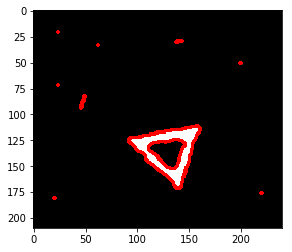

In [44]:
img_copy = img.copy()
cv2.drawContours(img_copy, contours, -1, (255, 0, 0), 2)
plt.imshow(img_copy);

To draw Individual contours:

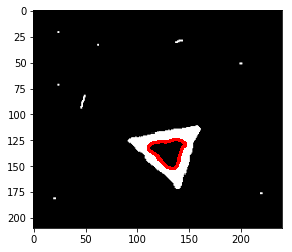

In [45]:
img_copy = img.copy()
cv2.drawContours(img_copy, contours, 3, (255, 0, 0), 2) #Draws fourth contour
plt.imshow(img_copy);

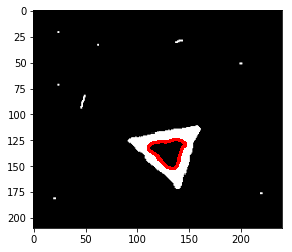

In [46]:
img_copy = img.copy()
cnt = contours[3]
cv2.drawContours(img_copy, [cnt], 0, (255, 0, 0), 2) #Draws fourth contour
plt.imshow(img_copy);

> Last two methods are same, but the seconds one is more useful.

##### Contour Approximation Method

Third arg of **cv2.findContours()**

We know that contours are the boundaries of a shape with same intensity. It stores (x,y) coordinates of the boundary of a shape. But does it store all the coordinates? That is specified by this contour approximation method. 

**cv2.CHAIN_APPROX_NONE** - all the boundary points are stored. But usually we don't need all the points. For instance, a contour of a stright line needs only two points.

**cv2.CHAIN_APPROX_SIMPLE** - removes all redundant points and compresses the contour, thereby saving memory.

In [79]:
def plot_subplot(img1, img2, title1, title2):
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(img1, 'gray')
    plt.title(title1)
    plt.xticks([])
    plt.yticks([]);

    plt.subplot(122)
    plt.imshow(img2, 'gray')
    plt.title(title2)
    plt.xticks([])
    plt.yticks([]);

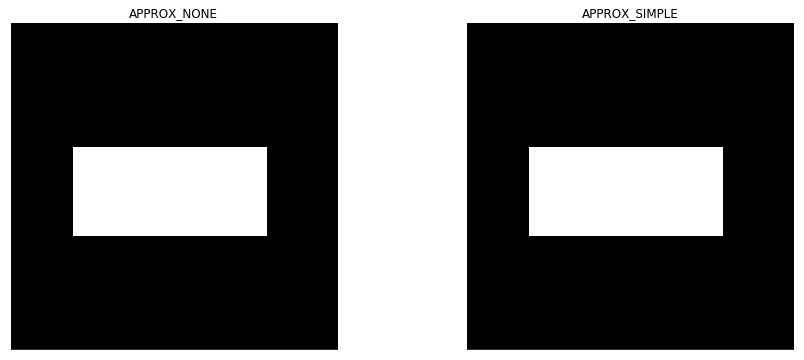

In [90]:
img = cv2.imread('images/binary_rect.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_thresh = cv2.threshold(img, 127, 255, 0)
image1, contours_none, hierarchy = cv2.findContours(img_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
image2, contours_simple, hierarchy = cv2.findContours(img_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_c1 = img.copy()
img_c2 = img.copy()

cv2.drawContours(img_c1, contours_none, 0, (0, 0, 255), 15)
cv2.drawContours(img_c2, contours_simple, 0, (0, 0, 255), 15)

plot_subplot(img_c1, img_c2, 'APPROX_NONE', 'APPROX_SIMPLE')